<h3 align="right">Felix Filipi</h3>
<h3 align="right">2301877590 </h3>

<hr>
<h1 align="center">Midterm Exam</h1>
<h1 align="center">Computer Vision</h1>
<hr>

<b>1A. [LO1& LO2, 10 points] Given a histogram of an image as it is shown in the below figure, how do you tell whether the associated image is having a good or bad contrast from its histogram. Describe detail steps of a histogram transformation process that will likely improve the image contrast.

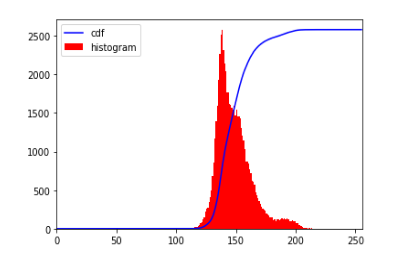
    <hr>

[-] How do you tell whether the associated image is having a good or bad contrast from its histogram?

<b>Answer</b>

Image Histogram is a graphical representation that depicts the relationship between the intensity of each pixel in an image. Histograms are represented in the form of bins or bar charts where each bin represents the frequency/intensity of each particular range of values. If we want to increase contrast then we need to increase the standard deviation of the frequency histogram, so that it can provide higher contrast because it will make the frequency of each pixel more evenly distributed. As for reduce contrast then we need to reduce the standard deviation so that it can provide a lower contrast, because the frequency of the pixels will become more concentrated on a primary peak.

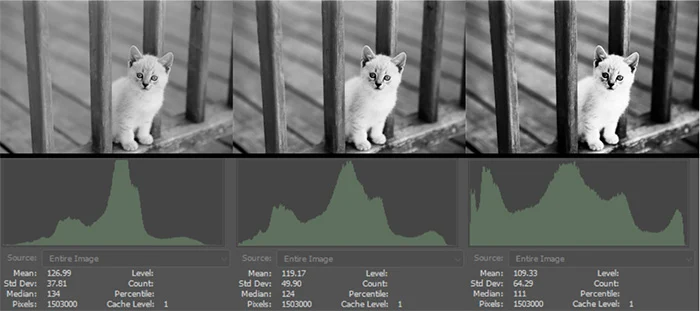

<h5 align="center">The image on the left has a low standard deviation, so the image is more concentrated on the primary peaks causing the image to have low contrast. While the image on the right has a high standard deviation, so it has a more concentrated image on the secondary peak or in other words it is more even than the image on the left, so this causes better contrast.</h5>

<hr>

So according to this explanation, it can be concluded that by making the <b>pixels more even / distributed</b> (making the ranges and secondary peaks more prominent), we can <b> increase the contrast </b>. Meanwhile, by making <b> more pixels concentrated to the primary peak </b> then we can <b> reduce the contrast </b> of the image.

<hr>

[-] Describe detail steps of a histogram transformation process that will likely improve the image contrast.

<b>answer</b>

To improve image contrast, we can use a technique called Histogram equalization.

Histogram equalization itself is a transformation that works by redistributing the frequency value of each pixel so that it can stretch the contrast to produce an image with better contrast. How this Transformation works is as follows:


1. Make sure the image is in grayscale.
2. Find the hist value (frequency grayscale value of each pixel).
3. Normalize each hist, by:

<h1 align="center">$norm = \dfrac{hist \,array}{total\,pixels}$</h1>

4. Perform cumulative sum (can be seen in code 1B):

<h1 align="center">$cs = cumsum(norm)$</h1>

5. Create a transformation with the following formula:

<h1 align="center">$ round(cs \times L-1)$</h1>
<h5 align="center">from</h5>

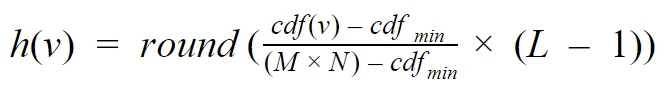

6. Apply transform to each pixel. 

<hr>

<b>*Note:</b>
$L-1$ here means $2^{bit}-1$

<hr>

<b>1B. [LO1 & LO2, 10 points] Using python notebook(.ipynb extension), demonstrate a contrast enhancement process on a low contrast image (an image of your choice) based on detail steps depicted in the problem 1. A. Your code must also be able to show side by side the image and its  associated histogram of  both the original  and  the  transformed images. You may  use relevant python libraries such as numpy, skimage and/or OpenCV to quickly implement your program. Please use markdown cells to put your comments on each code segment

(array([99184., 22544., 15539., 13061., 11587., 18949., 15412., 11781.,
        10178., 18467., 11894., 14558., 13318., 16217., 10243., 17509.,
        11433., 11905., 16304., 10627., 17476., 12711., 13685., 13320.,
        12523., 15119., 13212., 15171., 11554., 15722., 11416., 16209.,
        12703., 11601., 16663., 12259., 15078., 12003., 14904., 11883.,
        16267., 12818., 10070., 17873.,  8385.,  9336., 10922., 15088.,
        20928., 18823.]),
 array([ 32.  ,  36.44,  40.88,  45.32,  49.76,  54.2 ,  58.64,  63.08,
         67.52,  71.96,  76.4 ,  80.84,  85.28,  89.72,  94.16,  98.6 ,
        103.04, 107.48, 111.92, 116.36, 120.8 , 125.24, 129.68, 134.12,
        138.56, 143.  , 147.44, 151.88, 156.32, 160.76, 165.2 , 169.64,
        174.08, 178.52, 182.96, 187.4 , 191.84, 196.28, 200.72, 205.16,
        209.6 , 214.04, 218.48, 222.92, 227.36, 231.8 , 236.24, 240.68,
        245.12, 249.56, 254.  ]),
 <BarContainer object of 50 artists>)

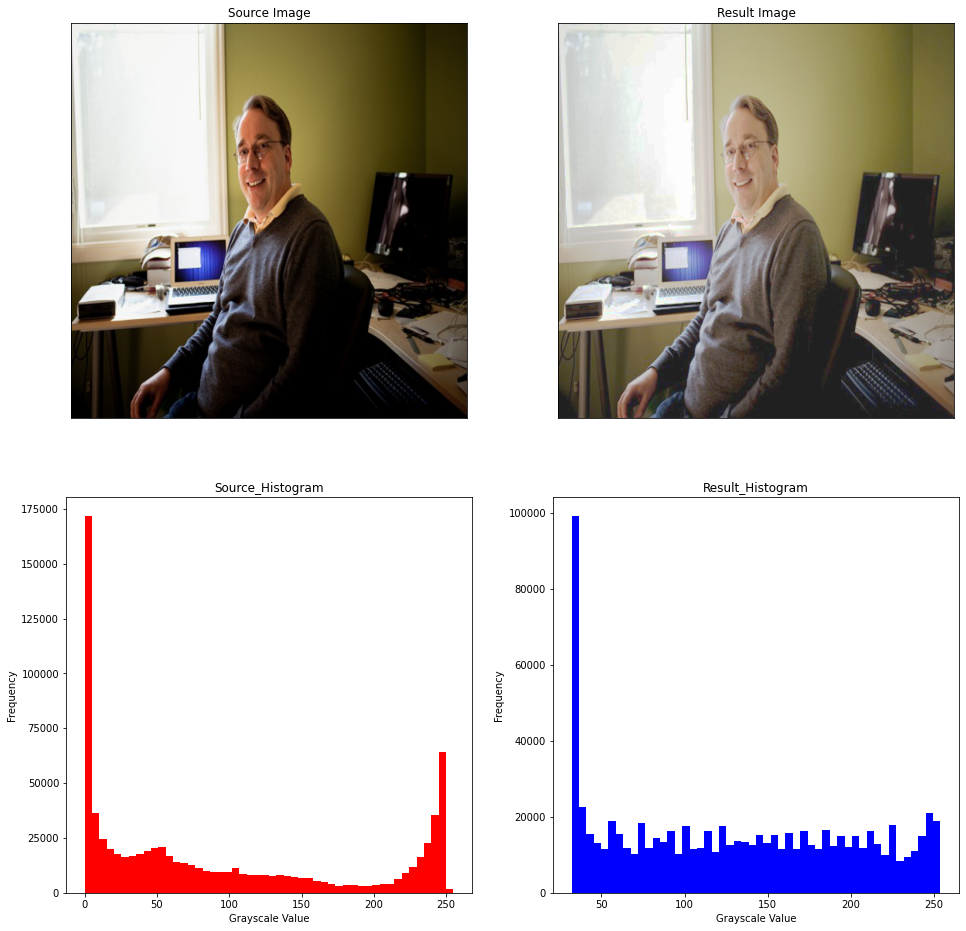

In [1]:
#import lib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = Image.open('linus.jpeg') #get image
img = img.resize((512,512)) #resize image pixel
img_array = np.asarray(img) #convert to array

hist = np.zeros(256) #grayscale value (between 0-255)

#loop through pixels and append it to the hist 
#(find frequency of each grayscale value between 0-255)
for pixel in img_array.flatten(): 
    hist[pixel]+=1                

#normalize each hist array
total_pixels = np.sum(hist) #sum of all hist freq
normalized_hist = hist/total_pixels 

#Cumulative summation
iter_hist = iter(normalized_hist)
cum_sum = [next(iter_hist)]
for i in iter_hist:
    cum_sum.append(cum_sum[-1] + i)

cum_sum = np.array(cum_sum)

#Transformation Formula (explained in 2.6)
transform = np.floor(cum_sum * 255).astype(np.uint8) #2^8 -1 = 255 (L-1)

img_arr_list = list(img_array.flatten()) #convert 2D to list of 1D

# transform each pixel
out_img = [transform[p] for p in img_arr_list]

# reshape and return into img_array (for picture)
out_img_array = np.reshape(np.asarray(out_img), img_array.shape)

#plot image
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.title("Source Image")
plt.yticks([]),plt.xticks([])
plt.imshow(img, cmap='gray')

plt.subplot(2,2,2)
plt.title("Result Image")
plt.yticks([]),plt.xticks([])
plt.imshow(out_img_array, cmap="gray")

#plot histogram
plt.subplot(2,2,3)
plt.title("Source_Histogram")
plt.xlabel("Grayscale Value") #0-255
plt.ylabel("Frequency")
plt.hist(img_array.flatten(),color="red", bins=50)

plt.subplot(2,2,4)
plt.title("Result_Histogram")
plt.xlabel("Grayscale Value")
plt.ylabel("Frequency")
plt.hist(out_img, color="blue",bins=50)

As we can see here, the image has become much better using histogram equalization, we can see that the original image has a high primary peak (about 175000) which means it doesn't have good contrast. Therefore, we need to perform a transformation which distribute pixels equally as to produce a better contrast which result the nice image in the right picture. (bad left, good right)

<hr>

<b>2. [LO1& LO2, 10 points] Describe precisely the effect of each linear filter shown in the above figures if it is applied to an image (an image of your choice). Which filters result in (a) stronger blurring image; (b) stronger brighten and (c) stronger darken the image. Demonstrate your computational codes in python notebook(.ipynb extension). Some relevant python libraries are welcome to employ and please use markdown cells to write your explanation/comments.
  
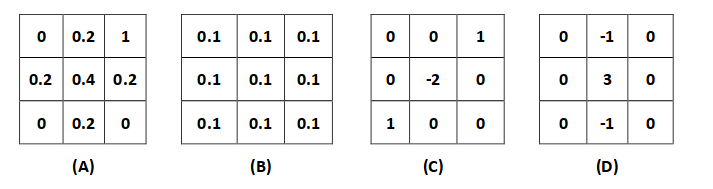

To answer this, we need to perform convolution for each kernel. So, let's define the function.

In [2]:
def convolve(img,kernel):
    
    #convert image to 1D before convolve
    img_flatten = img.flatten()
    #Convolve each direction
    convolved = np.convolve(img_flatten,kernel,"same")
    #Reshape, so we can plot it as image
    convolved_img = np.reshape(convolved,img.shape)
    
    return convolved_img

<b>Now, let's try to implement the convolution for the (A) kernel. First, we need to load the image

(([], []), ([], []))

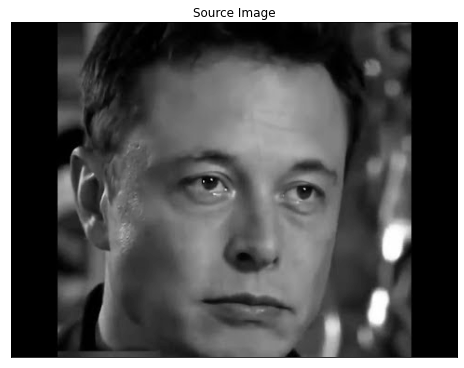

In [3]:
import cv2
img_2 = cv2.imread('elon.jpeg',0)

#visualize original image
plt.figure(figsize=(8,8))
plt.imshow(img_2, cmap="gray")
plt.title('Source Image')
plt.xticks([]),plt.yticks([])

Now, to make visualization easier, let's convolve all of the image and visualize it side by side

In [4]:
# Visualization function
def visualize(img_list, title_list):
    plt.figure(figsize=(15,15))
    for i in range(len(img_list)):
        plt.subplot(2,2,i+1)
        plt.imshow((img_list[i]),cmap="gray")
        plt.title(title_list[i])
        plt.xticks([]),plt.yticks([])

# init empty list
img_list = []

<b>Now, try implement the the first / A kernel

In [5]:
A_kernel = np.array(
        [0, 0.2, 1,
         0.2, 0.4, 0.2,
         0, 0.2, 0]) #plot in 1D, because we are going to use np.convolve

convolved_img = convolve(img_2,A_kernel)
img_list.append(convolved_img)

<b>Now, try implement the the second / B kernel

In [6]:
B_kernel = np.array(
        [0.1, 0.1, 0.1,
         0.1, 0.1, 0.1,
         0.1, 0.1, 0.1]) #plot in 1D, because we are going to use np.convolve

convolved_img = convolve(img_2,B_kernel)
img_list.append(convolved_img)

<b>Convolve the third / C kernel

In [7]:
C_kernel = np.array(
        [0, 0, 1,
         0, -2, 0,
         1, 0, 0]) #plot in 1D, because we are going to use np.convolve

convolved_img = convolve(img_2,C_kernel)
img_list.append(convolved_img)

<b>And the last one, convolve the fourth / D kernel

In [8]:
D_kernel = np.array(
        [0, -1, 0,
         0, 3, 0,
         0, -1, 0]) #plot in 1D, because we are going to use np.convolve

convolved_img = convolve(img_2,D_kernel)
img_list.append(convolved_img)

<b> We've already convolve each kernel, now let's check the results

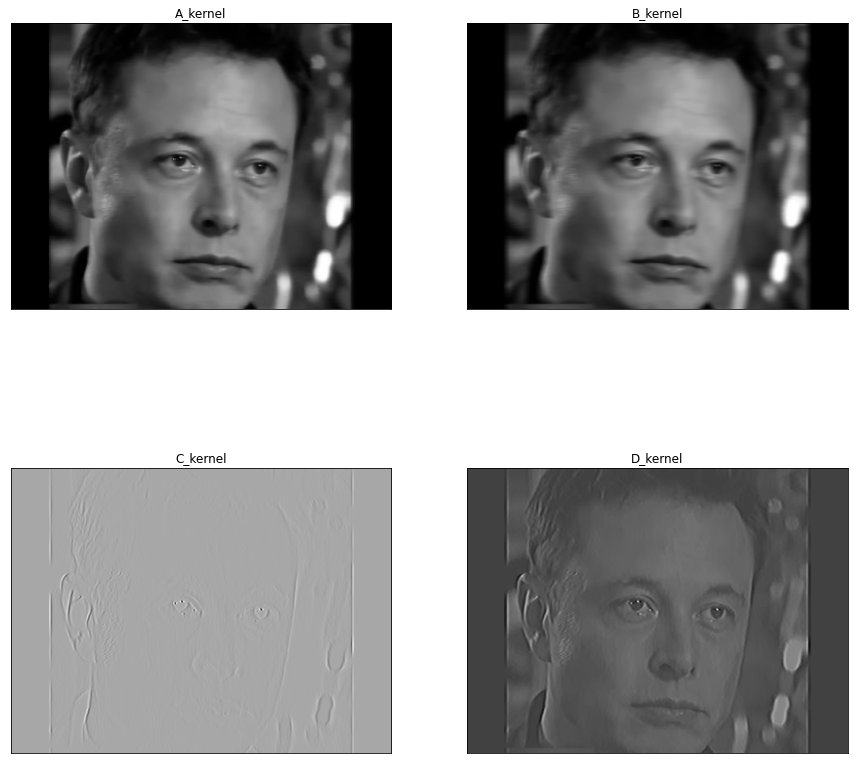

In [9]:
title_list = ['A_kernel','B_kernel','C_kernel','D_kernel']

visualize(img_list, title_list)

<b>Now, we've already convolved each kernel and got the result as the above images. But, before answering the asked questions, I will show the hist plot first just to make it clear.

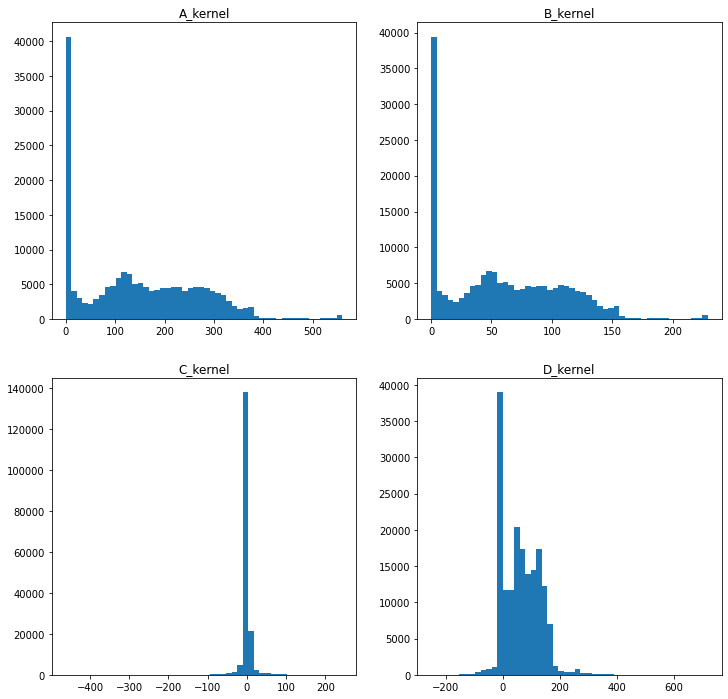

In [10]:
plt.figure(figsize=(12,12))
for i in range(len(img_list)):
    plt.subplot(2,2,i+1)
    plt.hist(img_list[i].flatten(),bins=50)
    plt.title(title_list[i])

<b>Questions</b>

Which filters result in (a) stronger blurring image; (b) stronger brighten and (c) stronger darken the image

<b>Answer.</b>

A. stronger blurring image = B kernel / filter.

B. stronger brighten image = D kernel / filter.

C. stronger darken image = C kernel / filter. (pixels primary peak on 0)

<b>3. [LO1 & LO2,  20 points] Explain  thoroughly  what  you  know  about (1)  non-maximum suppression and (2)  hysteresis  thresholding in the Canny edge detector  algorithm. Use diagram  if neccessary to  show how both techniques  are  carried  out. Implement  the aforementioned  approaches in  python  notebook (.ipynb  extension) and  demonstrate  the results. Again, you may use relevant python libraries and a sample image of your choice.

<b>Instruction</b>

Explain thoroughly what you know about (1) non-maximum suppression and (2) hysteresis thresholding in the Canny edge detector algorithm.

<b>Answer</b>

<b>1. non-maximum suppression

The edge detection image should have thin edges, we don't need a lot of strike inside an edge to be seen. Thus, we must perform non-maximum suppression to thin out the edges.

So how do non-maximum suppression works? This algorithm goes through all the points on the edge and finds the pixels with the maximum value in the edge directions.

So this algorithm work like this: 
    
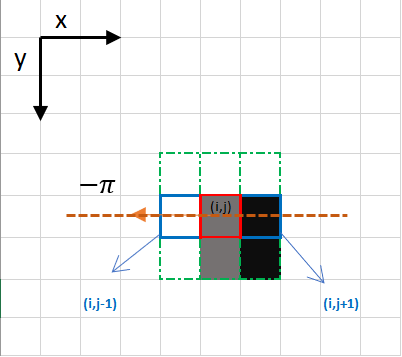

<b>The algorithm's purpose is to check if the pixels on the same direction are more or less intense than the one being processed.</b>

In the example above, the pixel (i, j) is being processed, and the pixels on the same direction are highlighted in blue (i, j-1) and (i, j+1). If one those two pixels are more intense than the one being processed, then only the more intense one is kept. Pixel (i, j-1) seems to be more intense, because it is white (value of 255). Hence, the intensity value of the current pixel (i, j) is set to 0. If there are no pixels in the edge direction having more intense values, then the value of the current pixel is kept.

So, this algorithm works as a threshold too, but its threshold depends on its own neighbors. For example, the gray pixel here will be set to be 0 because there's a higher intensity which is a white pixel on its left. And this will be worked until the pixel left only the black (i,j+1) pixel.

So, as summary, here's how to do non-max suppresion:

1. Create a matrix initialized to 0 of the same size of the original gradient intensity matrix;
2. Identify the edge direction based on the angle value from the angle matrix;
3. Check if the pixel in the same direction has a higher intensity than the pixel that is currently processed;
4. Return the image processed with the non-max suppression algorithm.

For a better understanding of how non-maximum suppression works, we can look at the code implementation later.

<b>2. hysteresis thresholding</b>

So, what does this step means to do? the Hysteresis mechanism aims to help us to determine which ones that could be considered as strong and the ones that are considered as non-relevant from weak pixel.

Based on the threshold results, the hysteresis consists of transforming weak pixels into strong ones, if and only if at least one of the pixels around the one being processed is a strong one, as described below: 

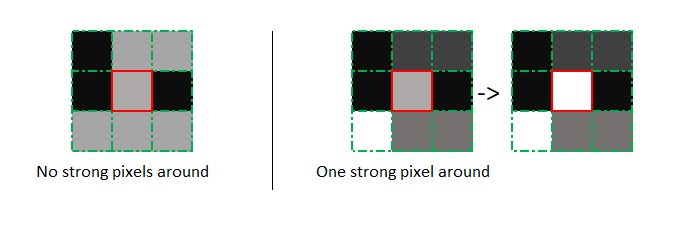

Further explanation can be seen in the code implementation below.

<b>Instruction</b>

Implement the aforementioned approaches in python notebook (.ipynb extension) and demonstrate the results.

<b> Now, we go into the code implementation. First, we need to load the images.

In [11]:
def load_img(img):
    loaded_img = np.array(Image.open(img))
    return loaded_img

# 5 steps of Canny Detection:

* Noise reduction;
* Gradient calculation;
* Non-maximum suppression;
* Double threshold;
* Edge Tracking by Hysteresis.

# Noise Reduction

<b>Before we do Noise Reduction using gaussian blur from scratch, we should preprocess it to become grayscale image. To do this, we can use grayscale converter from scratch using this formula:</b>

<h3 align="center">$Gray = 0.2989 \times R + 0.5870 * G + 0.1140 * B$

In [12]:
def grayscale(img):
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

Now we go into the topic.

Edge Detection highly sensitive to image noise. That's why we should preprocess the image by removing this noise using blur kernel to smooth it. Usually Canny detection use gaussian blue as its preprocessing method.

The equation for a Gaussian filter kernel of size (2k+1)×(2k+1) is given by:

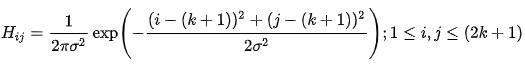

The role of sigma in the Gaussian filter is to control the variation around its mean value. So as the Sigma becomes larger the more variance allowed around mean and as the Sigma becomes smaller the less variance allowed around mean.

### And here's the code for gaussian blur from scratch:

In [13]:
def gauss_blur(image, ksize, sigma = 1): #set default sigma 1
        
    #This formula can be seen from above explanation
    normalization = 1 / (2 * np.pi * sigma**2)
    
    #split mgrid to make sure kernel have its true size
    ksize = round(ksize//2) 
    
    #generate 2D kernel with different direction (i horizontal, j vertical) between kernel size 
    #The i variable for (i-(k+1)) and j variable for (j-(k+1)) 
    i, j = np.mgrid[-ksize:ksize+1, -ksize:ksize+1] 

    #Generated gaussian kernel from formula
    kernel =  normalization * np.exp(-((i**2 + j**2) / (2*sigma**2))).flatten() #flatten to convolve
    print(f"Kernel = {kernel}")
    #Convolve the kernel to image
    image = image.flatten()
    res = np.convolve(image,kernel,"same") #np.convolve works in 1D arr
    res = np.reshape(res,(gray.shape)) #return as its true 2D arr to visualize it
    return res

### In order to make visualization more easier, we can define it as.

In [14]:
def visualize(img_list,title_list):
    plt.figure(figsize=(16,16))
    for i in range(len(img_list)):
        plt.subplot(3,3,i+1)
        plt.imshow(img_list[i], cmap = 'gray')
        plt.xticks([]),plt.yticks([])
        plt.title(title_list[i])
        
def one_visualize(img,title):
    plt.figure(figsize=(16,16))
    plt.imshow(img, cmap = 'gray')
    plt.xticks([]),plt.yticks([])
    plt.title(title)

### Now, all function has been created, let's try to call the function.

Kernel = [0.05854983 0.09653235 0.05854983 0.09653235 0.15915494 0.09653235
 0.05854983 0.09653235 0.05854983]


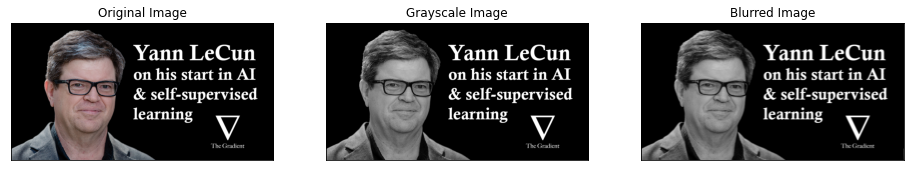

In [15]:
img = load_img('yann.jpeg')
gray = grayscale(img)
blur_img = gauss_blur(gray,3) #default sigma 1

img_list = [img,gray,blur_img]
title_list = ['Original Image', 'Grayscale Image', 'Blurred Image']
visualize(img_list,title_list)

### Now we have done the Noise Reduction step, now let's go deeper into the next phase which is Gradient Calculation

# Gradient Calculation

The Gradient calculation step detects the edge intensity and direction by calculating the gradient of the image using edge detection operators. The easiest way to detect the edge is by applying a filter that changes both directions x and y. So, it can be done by convolving it using Sobel kernels. Here's what's the mean of Sobel's kernel:

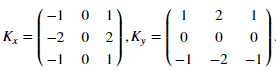

Later, after the image already convolved by each kernel, then we should apply magnitude $(G)$ and slope $\theta$ of the gradient, which calculated as follow:

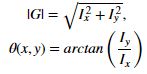

So, now we know the theory of this gradient calculation. Let's go deeper into the code implementation

In [16]:
def sobel_edge_detection(img):
    
    #Define the sobel_kernel
    X_kernel = np.array(
        [-1,0,1,
         -2,0,2,
         -1,0,1]) #plot in 1D, because we are going to use np.convolve
    
    Y_kernel = np.array(
        [1,2,1,
         0,0,0,
         -1,-2,-1]) #plot in 1D, because we are going to use np.convolve
    
    #convert image to 1D before convolve
    img_flatten = img.flatten()
    #Convolve each direction
    X_convolve = np.convolve(img_flatten,X_kernel,"same")
    Y_convolve = np.convolve(img_flatten,Y_kernel,"same")
    
    #After each convolve done, we need to apply hypotenuse sqrt(x**2 + y**2)
    #Numpy provide the build in function which is np.hypot, but let's try to do it from scratch
    hypotenuse = np.sqrt(X_convolve**2 + Y_convolve**2)
    sobel_res = np.abs(hypotenuse) #the formula describe the absolute function in its formula
    sobel_res = np.reshape(hypotenuse,img.shape) #back to 2D form to visualize it
    
    #Go into next formula, slope of the gradient
    slope = np.arctan2(X_convolve,Y_convolve)
    slope = np.reshape(slope,img.shape)
    
    return sobel_res, slope

### Now we have done creating the function. Let's try to call it.

In this phase, I will try to figure out what will happen if we didn't use noise reduction in our gradient calculation.

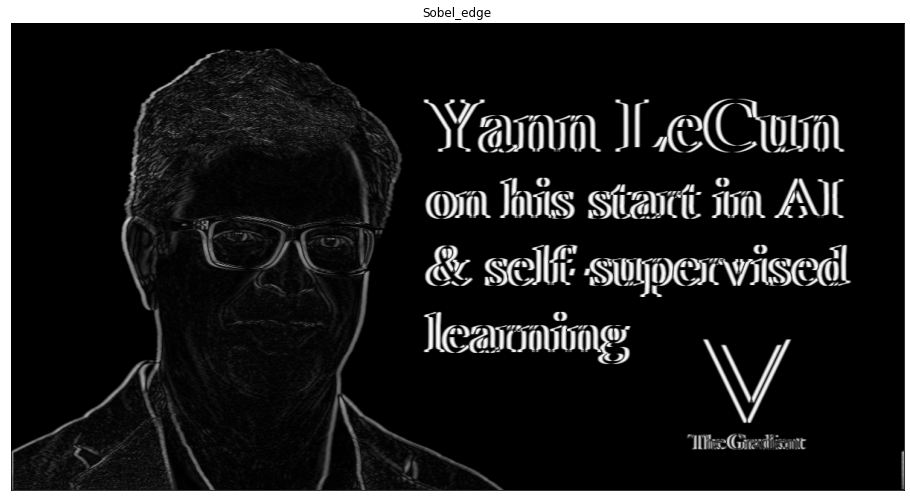

In [17]:
gradient_calculated, slope = sobel_edge_detection(gray)

one_visualize(gradient_calculated,'Sobel_edge')

### Now we have done the Gradient Calculation step, now let's go to the next phase which is Non-Maximum Suppression

We've explained about the Non-Maximum Supression above. Let's just implement the code.

In [18]:
def non_max_suppression(img,theta):
    height = img.shape[0]
    width = img.shape[1]
    
    #Create matrix init to 0 of the same size of the original img.
    non_max = np.zeros((height,width))
    
    
    #Identify the edge direction based on the angle.
    
    
    #Convert from radians to degrees by multiplying the number of radians by 180/pi.
    #theta = radians
    angle = theta * (180 / np.pi) 
     
    #This returns the degree between -180 to 180
    #which we will convert from 0 to 360 by adding 180 to gradient_direction
    angle[angle < 0] += 180
    
    #Check if the pixel in the same direction has a higher intensity than currently processed pixel.
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            PI = 180
            direction = angle[i,j]
            
            # 0 to 22.5 (PI / 8)
            if (0 <= direction < PI / 8) or (15 * PI / 8 <= direction <= 2 * PI):
                before_pixel = img[i, j - 1]
                after_pixel = img[i, j + 1]
            
            #22.5 to 67.5 (3* PI / 8)
            elif (PI / 8 <= direction < 3 * PI / 8) or (9 * PI / 8 <= direction < 11 * PI / 8):
                before_pixel = img[i + 1, j - 1]
                after_pixel = img[i - 1, j + 1]
                
            #67.5 to 112.5 (5 * PI / 8)
            elif (3 * PI / 8 <= direction < 5 * PI / 8) or (11 * PI / 8 <= direction < 13 * PI / 8):
                before_pixel = img[i - 1, j]
                after_pixel = img[i + 1, j]
                
            #112.5 to 157.5 (7 * PI / 8)
            else:
                before_pixel = img[i - 1, j - 1]
                after_pixel = img[i + 1, j + 1]
                
            #check direction then append to value    
            if(img[i,j] >= before_pixel) and (img[i,j] >= after_pixel):
                non_max[i,j] = img[i,j]
            else:
                non_max[i,j] = 0
                
    return non_max

<b>Now we have done creating the function. Let's try to call it. 

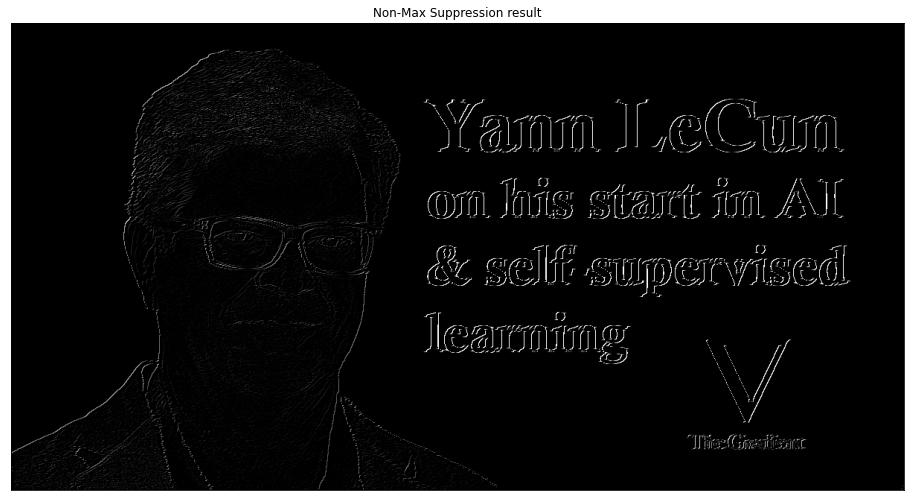

In [19]:
nms = non_max_suppression(gradient_calculated, slope)
one_visualize(nms,'Non-Max Suppression result')

The result is the same image with thinner edges. However as we can see, some pixels seems to be brighter than others, and we will try solve it in the next two final steps.

### We have done the Non-Maximum Suppression step, now let's go to the next phase which is Double Threshold

The double threshold aims to identify 3 kinds of pixels which is strong, weak, and non-relevant. And double threshold itself stand for High threshold and low threshold. Here's the explanation:

* Strong pixels are pixels that have high intensity which will contribute to the final edge. This strong pixels will be identified by high threshold, when the value higher than the threshold it can be classified as strong pixels.

* Weak pixels are pixels that have an intensity value that is not enough to be considered as strong ones, but yet not small enough to be considered as non-relevant for the edge detection. This weak pixels will be identified by low threshold, when the value lower than the threshold, then it can be classified as weak pixels.

* Other pixels are considered as non-relevant for the edge.

<b>So, now we have know about the theory, now let's jump into the code.

In [20]:
def default_threshold(img):
    high_threshold = img.max() * 0.09
    low_threshold = high_threshold * 0.05
    return high_threshold, low_threshold
    
def double_threshold(img, threshold = default_threshold(img)): #define default
    
    #define high and low threshold
    high_threshold = threshold[0]
    low_threshold = threshold[1]
    
    height = img.shape[0]
    width = img.shape[1]
    
    #Create matrix init to 0 of the same size of the original img.
    double_thresholded = np.zeros((height, width))
    
    #strong pixels means higher than its high threshold
    strong_height, strong_width = np.where(img >= high_threshold)
    
    #weak pixels means lower than higher threshold but higher than its minimum threshold
    weak_height, weak_width = np.where((img< high_threshold) & (img >= low_threshold))
    
    #other means useless,not related pixel
    other_height, other_width = np.where(img < low_threshold)
    
    double_thresholded[strong_height, strong_width] = 255 #higher than threshold set 255
    double_thresholded[weak_height, weak_width] = 50 #weak values set as 20
    
    return double_thresholded

<b> Now we have done creating the function. Let's try to call it. 

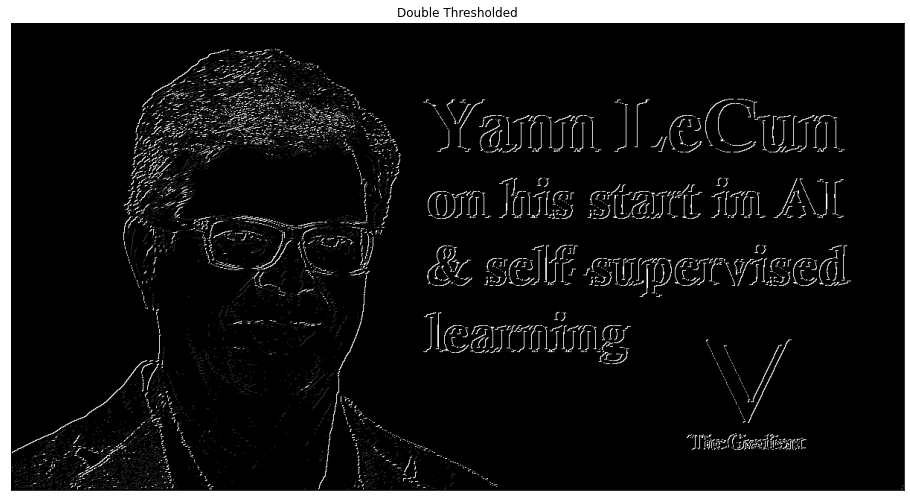

In [21]:
double_thresholded = double_threshold(nms, (180,80))
one_visualize(double_thresholded,'Double Thresholded')

### So much step has been done, and now it's going to be the end. This is the last step needed to generate canny edge detection. Edge Tracking by Hysteresis

The theory of hysteresis has been explained, now let's just implement it with the code.

In [22]:
def hysteresis(img, weak = 50, strong = 255):
    height = img.shape[0]
    width = img.shape[1]
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if(img[i,j] == weak):
                if ((img[i+1, j-1] == strong) 
                    or (img[i+1, j] == strong) 
                    or (img[i+1, j+1] == strong)
                    or (img[i, j-1] == strong) 
                    or (img[i, j+1] == strong)
                    or (img[i-1, j-1] == strong) 
                    or (img[i-1, j] == strong) 
                    or (img[i-1, j+1] == strong)): #try each direction of pixel
                    
                    img[i,j] = strong
                else:
                    img[i,j] = 0
    return img

<b>Now we have done creating the function. Let's try to call it. 

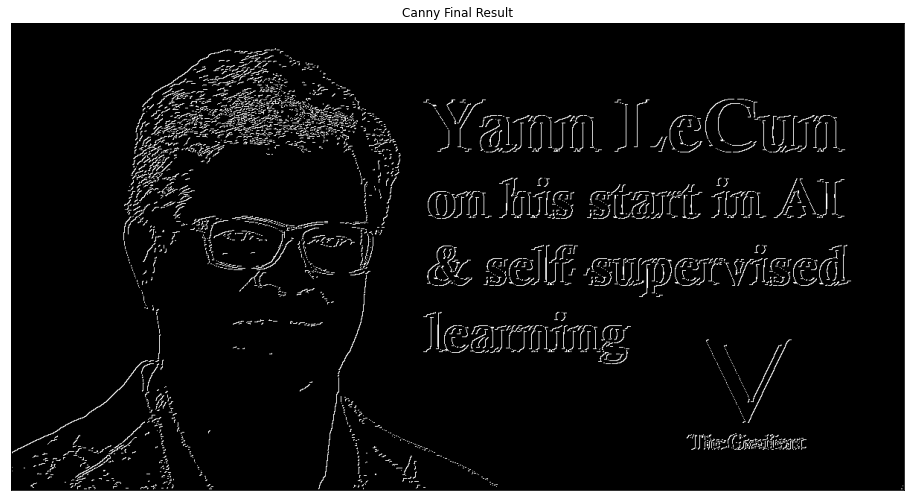

In [23]:
res = hysteresis(double_thresholded)
one_visualize(res,'Canny Final Result')

<b>4. [LO1 & LO2, 25 points] Demonstrate Harris corner algorithm based on the following steps using python notebook(.ipynb extension)(please use an image and a Gaussian filter of your own):</b>
    
1. Compute Gaussian derivatives at each pixel.
2. Compute second moment matrix M in a Gaussian window around each pixel
3. Compute corner response function R
4. Threshold R
5. Find local maxima of response function (non-maximum suppression)

<h3> Harris Corner </h3>

The idea is to consider a small window around each pixel p in an image. We want to identify all such pixel windows that are unique. Uniqueness can be measured by shifting each window by a small amount in a given direction and measuring the amount of change that occurs in the pixel values.

we take the sum squared difference (SSD) (also known as squared euclidean distance) of the pixel values before and after the shift and identifying pixel windows where the SSD is large for shifts in all 8 directions.

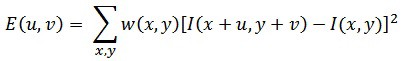

where u,v are the x,y coordinates of every pixel in our 3 x 3 window and I is the intensity value of the pixel. The features in the image are all pixels that have large values of E(u,v), as defined by some threshold and we have to maximize this function E(u,v) for corner detection.

So, we can achieve it by implements Taylor expansion to the equation, and after some mathematical operation, we get the final equation as:

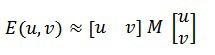

Where M stands for:

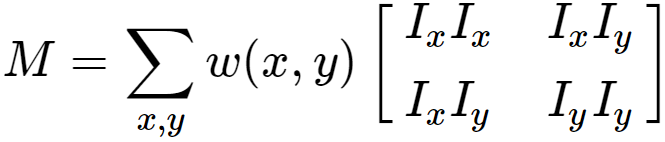

But it's not over yet, the response of the corner detector is obtained, using this formula:

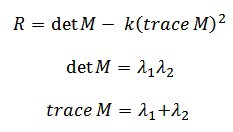

Depend on the value obtained by this formula, we can determine if a region determined as a flat, edge or a corner.

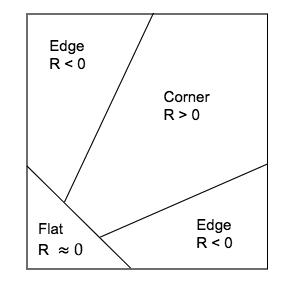


<b>We know the concept just now, seems complicated right?? So, let's try to implement it with code to simplify it.

In [24]:
# Grayscale the original image

def load_image(img):
    ds = cv2.imread(img)
    ds = cv2.resize(ds, (350,200))
    gray = cv2.cvtColor(ds, cv2.COLOR_BGR2GRAY)
    return ds, gray

def harris_corner(img, threshold=10000, ksize = 3, k = 0.05):
    
    corners = []
    output_img = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2RGB)
    
    offset = int(ksize/2)
    y_range = img.shape[0] - offset
    x_range = img.shape[1] - offset
    
    # Find x and y derivatives
    dy, dx = np.gradient(img)
    Ixx = np.square(dx)
    Iyy = np.square(dy)
    Ixy = dx * dy
    
    
    # For each pixel in the grayscale image, convolve 3×3 window and compute the corner strength function.
    
    for y in range(offset, y_range):
        for x in range(offset, x_range):
            
            # set sliding windows value / kernel start-end
            x_start = x - offset
            x_end = x + offset + 1
            
            y_start = y - offset
            y_end = y + offset + 1
            
            # sum of square
            Sxx = np.sum(Ixx[y_start:y_end, x_start:x_end])
            Syy = np.sum(Iyy[y_start:y_end, x_start:x_end])
            Sxy = np.sum(Ixy[y_start:y_end, x_start:x_end])
            
            
            # To get corner response we need to find its determinant and trace
            det = (Ixx * Ixy) - (Ixy ** 2) # determinant
            trace = Ixx + Iyy # trace
    
            # Compute corner response function (formula can be seen in above explanation)
            response = det - k * (trace ** 2)

    # Threshold the output pixels to prevent redundant duplicate of features.
    for i in range(response.shape[1]):
        for j in range(response.shape[0]):
            if (response[j,i] > threshold):
                
                # Color the corner pixel as green
                output_img[j,i] = (0,255,0)                
    
    return output_img

def visualize(img_list, title_list):
    plt.figure(figsize=(15,15))
    for i in range(len(img_list)):
        plt.subplot(5,3,i+1)
        plt.imshow(img_list[i],cmap="gray")
        plt.xticks([]), plt.yticks([])
        plt.title(title_list[i])

<b>We've done creating all needed process to perform harris corner detection. Now let's call each function

In [25]:
img,gray = load_image('iss.jpeg')

We've load the image, now we need to perform gaussian blur

In [26]:
blur = gauss_blur(gray,3,sigma=0.5)

Kernel = [0.0116601  0.08615712 0.0116601  0.08615712 0.63661977 0.08615712
 0.0116601  0.08615712 0.0116601 ]


Now, let's call our harris corner detection function.

In [27]:
output_img = harris_corner(blur.astype(np.uint8),1000000)

We've done the harris corner detection. Now, visualize it.

(([], []), ([], []))

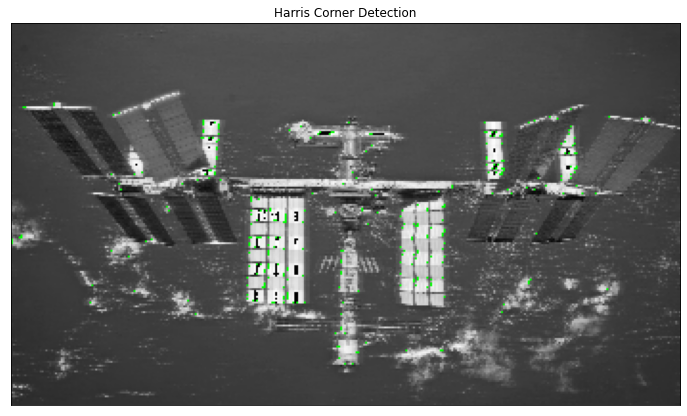

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(output_img)
plt.title('Harris Corner Detection')
plt.xticks([]),plt.yticks([])

<b>This is the result of the harris corner detection, the green dot here acts as the corner result from the image

<b>5. [LO1 & LO2, 25  points]Given  some  key-points  in  the  image  and  their  corresponding  key-points in the other image as they are all shown in the below figures, write detail steps on how they are created and how an image matching process based on the key-points is carried out. Credit will be given to someone who is able to demonstrate the matching process in python notebook(.ipynb extension). You may use your own images. 
    
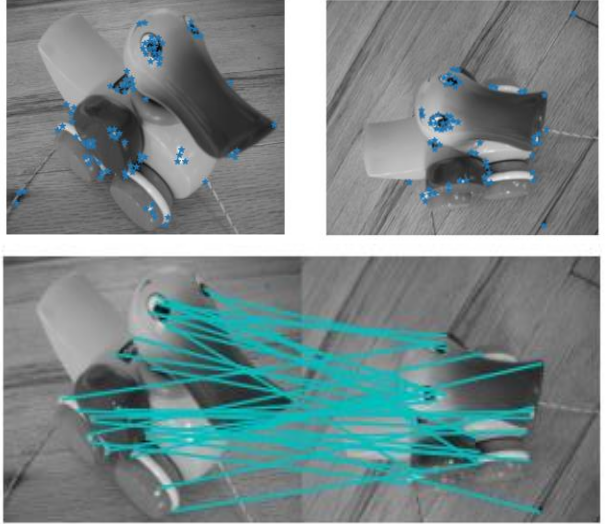

<b> Write detail steps on how they are created and how an image matching process based on the key-points is carried out.

To create an image matching process, there's 3 main components that should be done:

1. Detection.

Before we go matching the images, we need to detect the interest point first, and this process called <b>feature detection</b>. So, What does feature detection mean? feature detection is an algorithm that chooses points from an image based on some criterion. Typically, an interest point is a local maximum of some function, such as a cornerness metric. To perform feature detection, there's so many algorithm which can be used, such as Harris corner, SIFT (Scale Invariant Feature Transform), SURF, ORB, etc.

2. Description.

Description or usually refer as feature descriptor is an algorithm that takes an image and outputs feature descriptors/feature vectors. Feature descriptors take interesting features/information which acts as identifiers of an image or perhaps can be called as “fingerprint” etc, that can be used to differentiate one feature from another. This feature/information should be invariant to the geometric transformation (such as translation, rotation, etc), and also photometric transformation (such as contrast, brightness, etc), so we can find the feature again even if the image is transformed in some way. Algorithm which can be used for description, SIFT, SURF, BRISK, BRIEF, ORB, etc.


Together an interest point and its descriptor is usually called a local feature. Local features are used for many computer vision tasks, such as object detection, and object recognition, etc.

3. Matching.

The descriptors later will be compared across the images, to identify similar features. A common approach to image matching consists of detecting a set of interest points each associated with image descriptors from image data. Once the features and their descriptors have been extracted from two or more images, the next step is to establish some preliminary feature matches between these images. Algorithm which can be used, brute force matching, FLANN (Fast Library for Approximate Nearest Neighboors).


<hr>
To perform image matching, first we need to detect the key points (to show where's the feature) and descriptor (to save the feature point), we can use any algorithm such as sift, surf, etc. But we will try to implement it using orb since it's the free version. Now I will explain how's orb (Oriented FAST and Rotated BRIEF) algorithm works.
<hr>

# ORB (Oriented FAST and Rotated BRIEF) algorithm

ORB builds on the well-known FAST keypoint detector and the BRIEF descriptor. So, in order to know about ORB algorithm we should understand what's FAST and BRIEF algorithms works.

### FAST (Features from Accelerated and Segments Test)

1. Given a pixel p in an array, fast will compares the brightness of p to surrounding 16 pixels that are in a small circle around p. 

2. Then, the pixels in the circle is  sorted into three classes (lighter than p, darker than p or similar to p). 

3. If more than 8 pixels are darker or brighter than p than it is selected as a keypoint. So keypoints found by fast gives us information of the location of determining edges in an image.

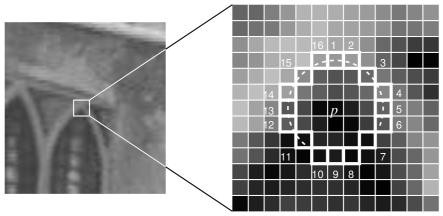

### BRIEF (Binary robust independent elementary feature)

Brief takes all keypoints found by the fast algorithm and convert it into a binary feature vector so that together they can represent an object. 

1. Brief start by smoothing image using a Gaussian kernel in order to prevent the descriptor from being sensitive to high-frequency noise. 

2. Then, brief select a random pair of pixels in a defined neighborhood around that keypoint. This neighborhood around pixel called as patch, which is a square of some pixel width and height. <b>The first pixel</b> in the random pair is drawn from a Gaussian distribution centered <b>around the keypoint</b> with a standard deviation or spread of sigma. Meanwhile, <b>the second pixel</b> is drawn from Gaussian distribution centered <b>around the first pixel</b> with a standard deviation or spread of sigma by two. 

3. If the first pixel is brighter than the second, it assigns the value of 1 to corresponding bit else 0.

4. And brief create this vector for each keypoint in an image.

<b>That's a brief introduction of how the ORB algorithm, the things to be remembered are ORB works by the FAST algorithm as keypoint detector and BRIEF algorithm as the descriptor. Now, let's jump to the code.

In [29]:
img_3, gray_3 = load_image('1.jpg')
img_4, gray_4 = load_image('2.jpg')

# Create ORB object 
orb = cv2.ORB_create()

# Call the function
keypoints1, descriptors1 = orb.detectAndCompute(img_3, None)
keypoints2, descriptors2 = orb.detectAndCompute(img_4, None)

<b> Now, we got the keypoints (from FAST algorithm) and descriptors (from BRIEF algorithm), the next step is match the images.

Here, we will use BFMatcher / brute force matcher as a matching algorithm. As the name implies, it takes the descriptor of one feature in the first set and matched it with all other features (this is why called brute force) in the second set using some distance calculation, then, the closest match will be returned. 

Let's jump to the code.

(([], []), ([], []))

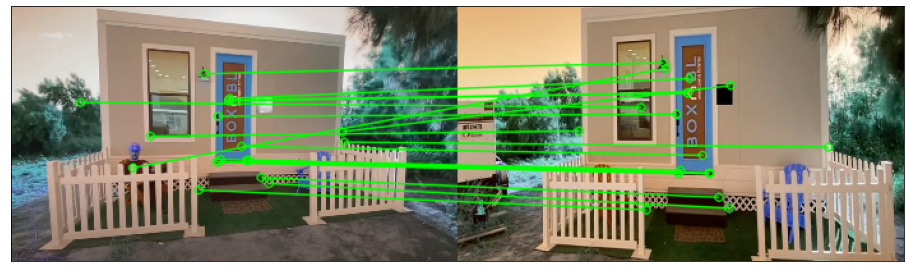

In [30]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Call match descriptors function.
matches = bf.match(descriptors1,descriptors2)

# Sort in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw matches, here, we just take 20 matches only to be drawn.
out_img = cv2.drawMatches(img_3,keypoints1,img_4,keypoints2,matches[:20], 
                          None,flags=2,matchColor = (0,255,0))

plt.figure(figsize=(16,16))
plt.imshow(out_img)
plt.xticks([]), plt.yticks([])